# Gaussian Bayes Training Notebook

## Imports

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read CSV Data

In [2]:
heart_attack_df = pd.read_csv("AI_training_data.csv")
heart_attack_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


## Clean up dataframe

Dropping data that we cannot use or simulate for our own project and renaming some columns.

In [3]:
heart_attack_df.drop('cp', inplace=True, axis=1)
heart_attack_df.drop('restecg', inplace=True, axis=1)
heart_attack_df.drop('exang', inplace=True, axis=1)
heart_attack_df.drop('oldpeak', inplace=True, axis=1)
heart_attack_df.drop('slope', inplace=True, axis=1)
heart_attack_df.drop('ca', inplace=True, axis=1)
heart_attack_df.drop('thal', inplace=True, axis=1)

heart_attack_df.rename(columns={"trestbps": "resting heart rate", "chol": "cholestrol", "fbs" : "fasting blood sugar > 120 mg/dl", "thalach" : "maximum heart rate achieved", "num" : "heart attack"}, inplace=True)

heart_attack_df

,age,sex,resting heart rate,cholestrol,fasting blood sugar > 120 mg/dl,maximum heart rate achieved,num
0,28,1,130,132,0,185,0
1,29,1,120,243,0,160,0
2,29,1,140,?,0,170,0
3,30,0,170,237,0,170,0
4,31,0,100,219,0,150,0
...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1
290,54,0,130,294,0,100,1
291,56,1,155,342,1,150,1
292,58,0,180,393,0,110,1


Removing rows that are missing data and thus are useless for training.

In [4]:
heart_attack_df = heart_attack_df.apply(pd.to_numeric, errors='coerce')
heart_attack_df = heart_attack_df.dropna()
heart_attack_df

,age,sex,resting heart rate,cholestrol,fasting blood sugar > 120 mg/dl,maximum heart rate achieved,num
0,28,1,130.0,132.0,0.0,185.0,0
1,29,1,120.0,243.0,0.0,160.0,0
3,30,0,170.0,237.0,0.0,170.0,0
4,31,0,100.0,219.0,0.0,150.0,0
5,32,0,105.0,198.0,0.0,165.0,0
...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1
290,54,0,130.0,294.0,0.0,100.0,1
291,56,1,155.0,342.0,1.0,150.0,1
292,58,0,180.0,393.0,0.0,110.0,1


array([[ 28.,   1., 130., ...,   0., 185.,   0.],
       [ 29.,   1., 120., ...,   0., 160.,   0.],
       [ 30.,   0., 170., ...,   0., 170.,   0.],
       ...,
       [ 56.,   1., 155., ...,   1., 150.,   1.],
       [ 58.,   0., 180., ...,   0., 110.,   1.],
       [ 65.,   1., 130., ...,   0., 115.,   1.]])

## Prepare dataset for training

Randomize rows to prevent overfitting of the machine learning models.

In [11]:
heart_attack_df = heart_attack_df.sample(frac=1)
heart_attack_df

,age,sex,resting heart rate,cholestrol,fasting blood sugar > 120 mg/dl,maximum heart rate achieved,num
121,51,1,130.0,224.0,0.0,150.0,0
230,45,1,130.0,219.0,0.0,130.0,1
164,55,1,120.0,270.0,0.0,140.0,0
158,55,0,130.0,394.0,0.0,150.0,0
227,39,1,110.0,280.0,0.0,150.0,1
...,...,...,...,...,...,...,...
217,54,1,125.0,224.0,0.0,122.0,1
100,48,1,110.0,211.0,0.0,138.0,0
231,46,1,120.0,231.0,0.0,115.0,1
14,35,1,120.0,308.0,0.0,180.0,0


Convert the dataset to a Numpy array to train with the Naive Bayesian Algorithm

In [18]:
dataset = heart_attack_df.to_numpy()
dataset

array([[ 51.,   1., 130., ...,   0., 150.,   0.],
       [ 45.,   1., 130., ...,   0., 130.,   1.],
       [ 55.,   1., 120., ...,   0., 140.,   0.],
       ...,
       [ 46.,   1., 120., ...,   0., 115.,   1.],
       [ 35.,   1., 120., ...,   0., 180.,   0.],
       [ 57.,   1., 140., ...,   0., 145.,   1.]])

In [25]:
X = dataset[:, :-1]
y = dataset[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


## Training the Gaussian Bayes classifier

In [43]:
def plot_confusion_matrix(y_test, y_pred, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    classes = ["positive", "negative"]
    np.set_printoptions(precision=2)

    title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

Gaussian Bayes heart attack classifier accuracy: 59.26%


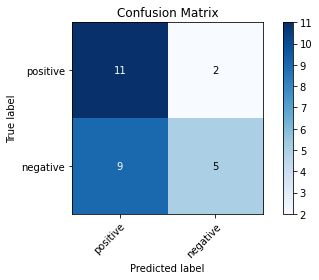

In [44]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Gaussian Bayes heart attack classifier accuracy: %.2f%%" % (float((y_test == y_pred).sum()) / X_test.shape[0] * 100))
plot_confusion_matrix(y_test, y_pred)